In [42]:
!pip install opencv-python matplotlib

In [1]:
import tensorflow as tf
import os

In [4]:
import cv2
import imghdr

In [50]:
data_dir = 'data' 

In [51]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [52]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [53]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [54]:
import numpy as np
from matplotlib import pyplot as plt

In [55]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 4184 files belonging to 4 classes.


In [56]:
os.listdir(data_dir)

['Blight', 'Common_Rust', 'Gray_Leaf_Spot', 'Healthy']

In [57]:
data_iterator = data.as_numpy_iterator()

In [58]:
batch = data_iterator.next()

In [59]:
batch[0].shape

(32, 256, 256, 3)

In [60]:
batch[1]

array([0, 1, 2, 2, 1, 0, 3, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 3, 3, 3, 2, 3,
       1, 0, 3, 3, 0, 2, 1, 3, 1, 0])

In [61]:
len(batch)

2

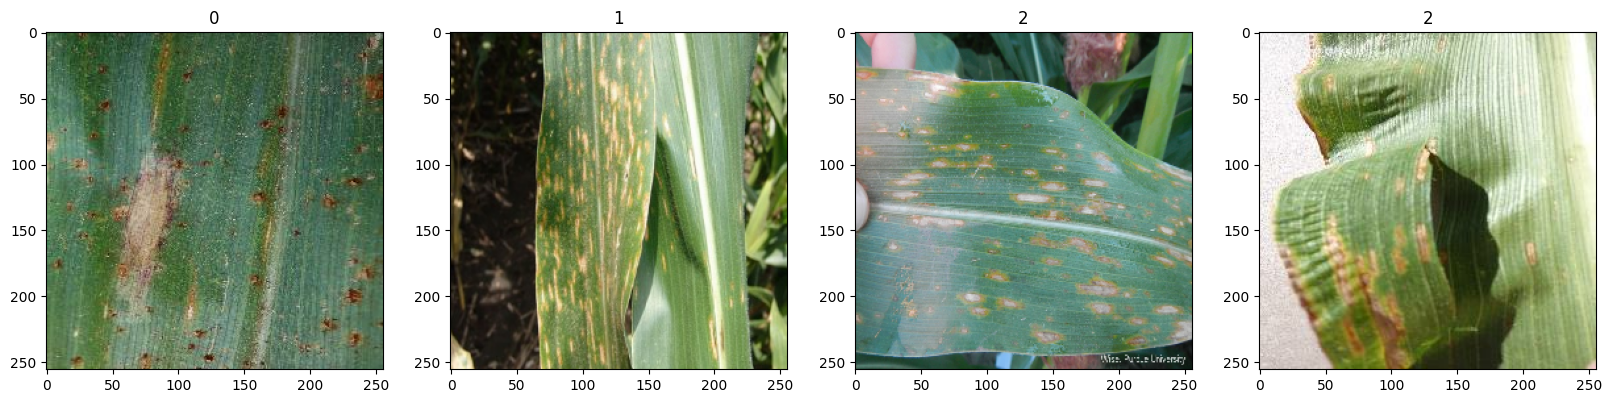

In [63]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [64]:
data = data.map(lambda x,y: (x/255, y))

In [65]:
data.as_numpy_iterator().next()

(array([[[[0.3882353 , 0.5411765 , 0.29411766],
          [0.38431373, 0.5372549 , 0.2901961 ],
          [0.38039216, 0.53333336, 0.28627452],
          ...,
          [0.5372549 , 0.5921569 , 0.36078432],
          [0.50980395, 0.5529412 , 0.33333334],
          [0.48235294, 0.5254902 , 0.30588236]],
 
         [[0.38039216, 0.53333336, 0.28627452],
          [0.38039216, 0.53333336, 0.28627452],
          [0.38039216, 0.53333336, 0.28627452],
          ...,
          [0.5411765 , 0.59607846, 0.3647059 ],
          [0.52156866, 0.5647059 , 0.34509805],
          [0.49411765, 0.5372549 , 0.31764707]],
 
         [[0.3764706 , 0.5294118 , 0.28235295],
          [0.3764706 , 0.5294118 , 0.28235295],
          [0.3764706 , 0.5294118 , 0.28235295],
          ...,
          [0.54901963, 0.6039216 , 0.37254903],
          [0.5254902 , 0.5764706 , 0.35686275],
          [0.5058824 , 0.5568628 , 0.3372549 ]],
 
         ...,
 
         [[0.60784316, 0.60784316, 0.5058824 ],
          [0.70196

In [66]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [67]:
train_size

91

In [68]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [69]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [80]:
model = Sequential()

In [81]:
# model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# model.add(MaxPooling2D())
# model.add(Conv2D(32, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Conv2D(16, (3,3), 1, activation='relu'))
# model.add(MaxPooling2D())
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

model.add(Conv2D(16, (3,3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))

# 🔄 Changed for 4-class output
model.add(Dense(4, activation='softmax'))

# Compile with appropriate loss (assuming labels = integers like 0,1,2,3)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [73]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [82]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,697,396 (14.10 MB)

 Trainable params: 3,697,396 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
logdir='logs'

In [84]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [85]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 272s 2s/step - accuracy: 0.6288 - loss: 1.0097 - val_accuracy: 0.8005 - val_loss: 0.4683
Epoch 2/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 71s 777ms/step - accuracy: 0.8370 - loss: 0.4101 - val_accuracy: 0.8377 - val_loss: 0.4042
Epoch 3/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 68s 737ms/step - accuracy: 0.8641 - loss: 0.3463 - val_accuracy: 0.8630 - val_loss: 0.3265
Epoch 4/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 68s 724ms/step - accuracy: 0.8781 - loss: 0.2987 - val_accuracy: 0.8413 - val_loss: 0.3659
Epoch 5/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 68s 740ms/step - accuracy: 0.8992 - loss: 0.2612 - val_accuracy: 0.8918 - val_loss: 0.2755
Epoch 6/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 74s 808ms/step - accuracy: 0.9352 - loss: 0.1830 - val_accuracy: 0.8882 - val_loss: 0.2969
Epoch 7/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 75s 719ms/step - accuracy: 0.9490 - loss: 0.1340 - val_accuracy: 0.8834 - val_loss: 0.3554
Epoch 8/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 65s 706ms/step - accuracy: 0.9672 - loss: 0.1000 - val_accura